Chapter 17
# NumPy线性代数
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

## 导入包

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_iris
import math

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 定义可视化函数

In [1]:
def visualize_2D(array, title, vmax, vmin):
    
    fig_width  = math.ceil(array.shape[1] * 0.5)
    fig_length = math.ceil(array.shape[0] * 0.5)
    
    fig, ax = plt.subplots(figsize=(fig_width, fig_length))
    # 注意，seaborn.heatmap() 目前只能接受2D数组
    # 本书中，一维数组可视化时用圆圈
    # 可视化时，只有二维、三维数组用方块
    
    sns.heatmap(array, 
                vmax = vmax,
                vmin = vmin,
                annot = True,      # 增加注释
                fmt = ".2f",       # 注释数值的格式
                square = True,     # 热图方格为正方形
                cmap = 'RdYlBu_r', # 指定色谱
                linewidths = .5,   # 方格线宽
                cbar = False,      # 不显示色谱条
                yticklabels=False, # 不显示纵轴标签
                xticklabels=False, # 不显示横轴标签
                ax = ax)           # 指定绘制热图的轴
    
    fig.savefig('Figures/' + title + '.svg', format='svg')

# 定义绘制一元数组可视化函数

## 导入鸢尾花数据

In [5]:
iris = load_iris()
# 从sklearn导入鸢尾花数据

X = iris.data
y = iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## 向量

### 向量内积

In [4]:
x_row_1   = X[[1 - 1], :]
x_row_2   = X[[2 - 1], :]
x_row_51  = X[[51 - 1], :]
x_row_101 = X[[101 - 1], :]

In [5]:
x_row_1

array([[5.1, 3.5, 1.4, 0.2]])

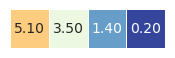

In [6]:
visualize_2D(x_row_1, '行向量，第1行', 8, 0)

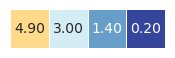

In [7]:
visualize_2D(x_row_2, '行向量，第2行', 8, 0)

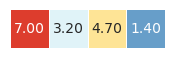

In [8]:
visualize_2D(x_row_51, '行向量，第51行', 8, 0)

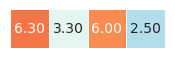

In [9]:
visualize_2D(x_row_101, '行向量，第101行', 8, 0)

In [6]:
# 提取四个列向量 (二维数组)
x_col_1 = X[:, [0]]
x_col_2 = X[:, [1]]
x_col_3 = X[:, [2]]
x_col_4 = X[:, [3]]

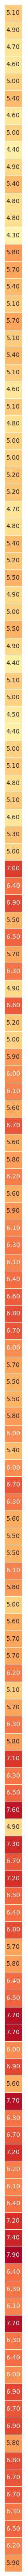

In [7]:
visualize_2D(x_col_1, '列向量，第1行', 8, 0)

## 向量内积

In [10]:
inner_prod_x_row_1_2 = np.dot(x_row_1[0], x_row_2[0])
inner_prod_x_row_1_2

37.489999999999995

In [11]:
inner_prod_x_row_1_51 = np.dot(x_row_1[0], x_row_51[0])
inner_prod_x_row_1_51

53.76

In [12]:
inner_prod_x_row_1_101 = np.dot(x_row_1[0], x_row_101[0])
inner_prod_x_row_1_101

52.57999999999999

### 向量范数

In [13]:
norm_x_row_1 = np.linalg.norm(x_row_1)
norm_x_row_2 = np.linalg.norm(x_row_2)
norm_x_row_51 = np.linalg.norm(x_row_51)
norm_x_row_101 = np.linalg.norm(x_row_101)

### 单位向量

In [14]:
unit_x_row_1   = x_row_1 / norm_x_row_1
unit_x_row_2   = x_row_2 / norm_x_row_2
unit_x_row_51  = x_row_51 / norm_x_row_51
unit_x_row_101 = x_row_101 / norm_x_row_101

### 向量夹角

In [15]:
dot_product_1_2 = np.dot(unit_x_row_1[0], unit_x_row_2[0])

angle_1_2 = np.arccos(dot_product_1_2) #angle in radian
angle_1_2 = np.rad2deg(angle_1_2)
angle_1_2

3.054647616988092

In [16]:
dot_product_1_51 = np.dot(unit_x_row_1[0], unit_x_row_51[0])

angle_1_51 = np.arccos(dot_product_1_51) #angle in radian
angle_1_51 = np.rad2deg(angle_1_51)
angle_1_51

21.81626618258243

In [17]:
dot_product_1_101 = np.dot(unit_x_row_1[0], unit_x_row_101[0])

angle_1_101 = np.arccos(dot_product_1_101) #angle in radian
angle_1_101 = np.rad2deg(angle_1_101)
angle_1_101

30.674283969016845

In [18]:
# X矩阵有四列，请大家分别计算列向量的模，列向量之间的夹角


## 矩阵乘法

### 第一个格拉姆矩阵

鸢尾花数据矩阵 $X$ 的格拉姆矩阵 $G$ 为：
$$ G = X^\mathsf{T} X $$  
其中，
$G$ 的形状为 $4 \times 4$  
$X^\mathsf{T}$ 的形状为 $4 \times 150$   
$X$ 的形状为 $150 \times 4$ 

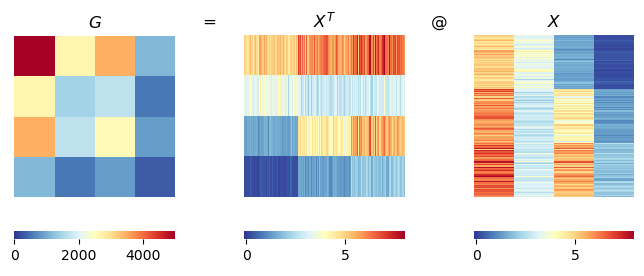

In [19]:
# 计算格拉姆矩阵
G = X.T @ X


fig,axs = plt.subplots(1,5,figsize = (8,3), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]})

# 这段代码使用Matplotlib库绘制了一个包含5个子图的图形窗口，
# 每个子图的宽度比例分别为3:0.5:3:0.5:3。
# 其中，plt.subplots(1,5)表示创建一个包含1行5列子图的Figure对象，
# 并返回一个包含5个AxesSubplot对象的数组axs。
# 参数figsize=(8,3)指定了整个图形窗口的大小为8英寸×3英寸，
# gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]}表示使用GridSpec布局，
# 将子图宽度的比例分别设为3:0.5:3:0.5:3。
# 这样设置可以使得子图的大小和位置能够按照比例分配，并且在整个图形窗口中居中对齐。
# 最后，将返回的Figure对象和AxesSubplot数组保存到变量fig和axs中，以便后续使用。

plt.sca(axs[0])
# sca的含义为Set the current Axes to ax
# plt.sca(axs[0]) 是Matplotlib库中的一个函数，
# 用于将当前的AxesSubplot对象设置为参数指定的对象。
# 在这个例子中，axs是一个包含5个子图的AxesSubplot数组，
# plt.sca(axs[0])表示将当前的AxesSubplot对象设置为数组中的第一个子图，即axs[0]。
# 这样设置后，所有后续的绘图操作都将作用在这个子图上，
# 直到下一次调用plt.sca()将当前对象切换为其他的AxesSubplot对象。

# 绘制格拉姆矩阵
ax = sns.heatmap(G, cmap = 'RdYlBu_r',
                 vmax = 5000, vmin = 0,
                 annot = False,
                 fmt=".0f",
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 square = 'equal')
plt.title('$G$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

# 绘制X转置
plt.sca(axs[2])
ax = sns.heatmap(X.T, cmap = 'RdYlBu_r',
                 vmax = 0, vmin = 8,
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels = False,
                 annot=False)
plt.title('$X^T$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

# 绘制X
plt.sca(axs[4])
ax = sns.heatmap(X, cmap = 'RdYlBu_r',
                 vmax = 0, vmin = 8,
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 annot=False)
plt.title('$X$')

fig.savefig('Figures/X的格拉姆矩阵.svg', format='svg')

### 第二个格拉姆矩阵

鸢尾花数据矩阵 $X^\mathsf{T}$ 的格拉姆矩阵 $H$ 为：
$$ H = XX^\mathsf{T} $$  
其中，
$H$ 的形状为 $150 \times 150$  
$X$ 的形状为 $150 \times 4$  
$X^\mathsf{T}$ 的形状为 $4 \times 150$   

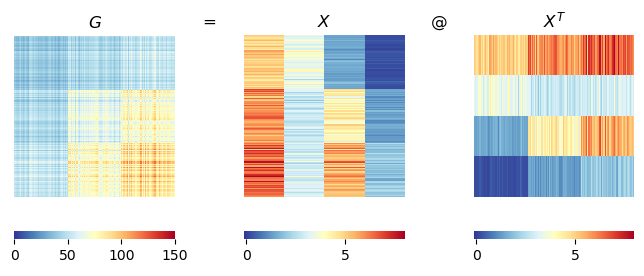

In [20]:

# 第二个格拉姆矩阵
H = X @ X.T

fig,axs = plt.subplots(1,5,figsize = (8,3), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]})

plt.sca(axs[0])

# 绘制格拉姆矩阵
ax = sns.heatmap(H, cmap = 'RdYlBu_r',
                 vmin = 0, 
                 vmax = 150,
                 annot = False,
                 fmt=".0f",
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 square = 'equal')
plt.title('$H$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

# 绘制X转置
plt.sca(axs[2])
ax = sns.heatmap(X, cmap = 'RdYlBu_r',
                 vmax = 0, vmin = 8,
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels = False,
                 annot=False)
plt.title('$X$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

# 绘制X
plt.sca(axs[4])
ax = sns.heatmap(X.T, cmap = 'RdYlBu_r',
                 vmax = 0, vmin = 8,
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 annot=False)
plt.title('$X^T$')

fig.savefig('Figures/XT的格拉姆矩阵.svg', format='svg')

## 矩阵的逆

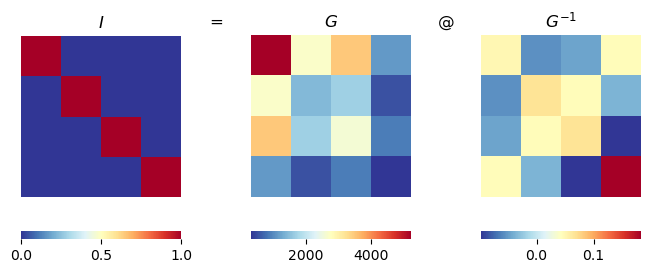

In [21]:
# 计算格拉姆矩阵G的逆矩阵
G_inv = np.linalg.inv(G)


fig,axs = plt.subplots(1,5,figsize = (8,3), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]})

plt.sca(axs[0])

# 绘制格拉姆矩阵
ax = sns.heatmap(np.eye(4), cmap = 'RdYlBu_r',
                 annot = False,
                 fmt=".0f",
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 square = 'equal')
plt.title('$I$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(G, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels = False,
                 annot=False)
plt.title('$G$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

# 绘制X
plt.sca(axs[4])
ax = sns.heatmap(G_inv, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 annot=False)
plt.title('$G^{-1}$')

fig.savefig('Figures/格拉姆矩阵的逆.svg', format='svg')

## Cholesky分解

In [22]:
# 对格拉姆矩阵G进行Cholesky分解
L = np.linalg.cholesky(G)
L

有关正定，请参考：  
https://mathworld.wolfram.com/PositiveDefiniteMatrix.html

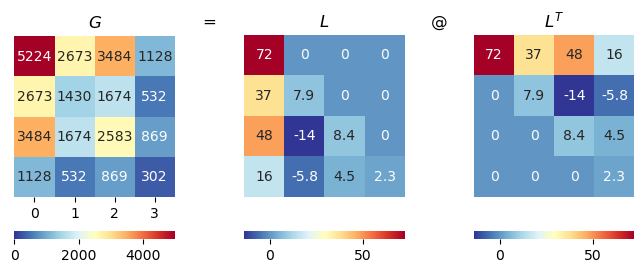

In [23]:
fig,axs = plt.subplots(1,5,figsize = (8,3), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]})

plt.sca(axs[0])
ax = sns.heatmap(G, cmap = 'RdYlBu_r',
                 vmax = 5000, vmin = 0,
                 cbar_kws = {'orientation':'horizontal'},
                 yticklabels=False,
                 annot=True,
                 fmt=".0f",
                 square = 'equal')
plt.title('$G$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(L, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels = False,
                 annot=True)
plt.title('$L$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

plt.sca(axs[4])
ax = sns.heatmap(L.T, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 annot=True)
plt.title('$L^T$')

fig.savefig('Figures/格拉姆矩阵，Chol.svg', format='svg')

## 特征值分解

In [24]:
# 对格拉姆矩阵G进行特征值分解
Lambdas, V = np.linalg.eig(G)
print(Lambdas)
print(V)

[9.20830507e+03 3.15454317e+02 1.19780429e+01 3.55257020e+00]
[[ 0.75110816  0.2841749   0.50215472  0.32081425]
 [ 0.38008617  0.5467445  -0.67524332 -0.31725607]
 [ 0.51300886 -0.70866455 -0.05916621 -0.48074507]
 [ 0.16790754 -0.34367081 -0.53701625  0.75187165]]


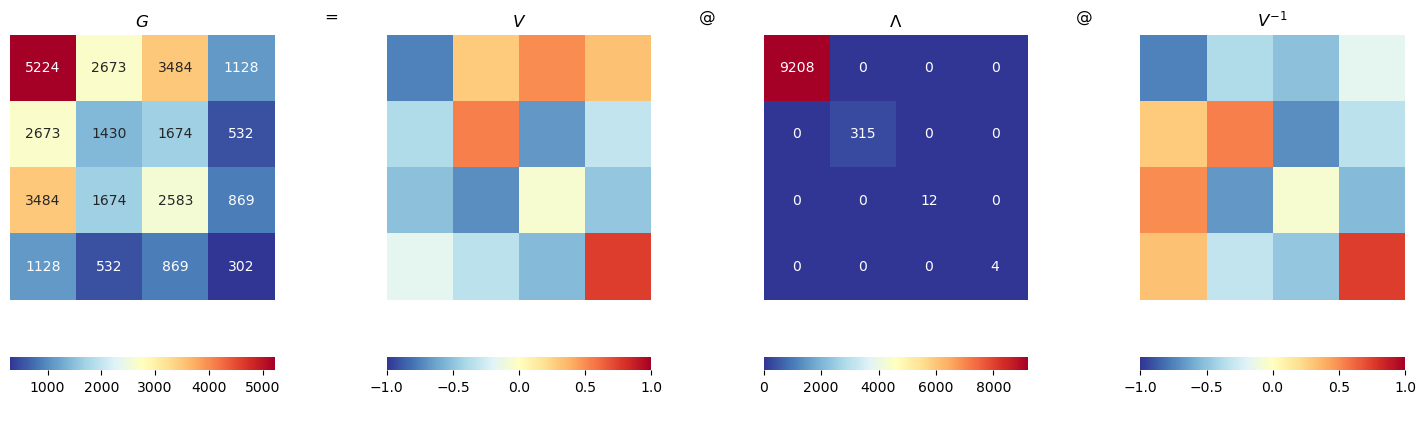

In [31]:
fig,axs = plt.subplots(1,7,figsize = (18,5), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3, 0.5, 3]})

plt.sca(axs[0])
ax = sns.heatmap(G, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 annot=True,
                 fmt=".0f",                 
                 yticklabels=False,
                 xticklabels=False,
                 square = 'equal')
plt.title('$G$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(V, cmap = 'RdYlBu_r',
                vmax = 1, vmin = -1,
                cbar_kws = {'orientation':'horizontal'},
                xticklabels = False,
                yticklabels = False,
                square = 'equal')
plt.title('$V$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

plt.sca(axs[4])
ax = sns.heatmap(np.diag(Lambdas), cmap = 'RdYlBu_r',
                # vmax = D_max, vmin = D_min,
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels = False,
                 annot=True,
                 fmt=".0f",                 
                square = 'equal')
plt.title('$\Lambda$')

plt.sca(axs[5])
plt.title('@')
plt.axis('off')    

plt.sca(axs[6])
ax = sns.heatmap(V.T, cmap = 'RdYlBu_r',
                vmax = 1, vmin = -1,
                cbar_kws = {'orientation':'horizontal'},
                yticklabels=False,
                xticklabels=False,
                square = 'equal')
plt.title('$V^{-1}$')

fig.savefig('Figures/格拉姆矩阵，EVD.svg', format='svg')

In [36]:
# 特征值开平方
np.sqrt(Lambdas)

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [33]:
# 谱分解中V的性质

In [33]:
V.T

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
       [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]])

In [32]:
V_inv = np.linalg.inv(V)
V_inv

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
       [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]])

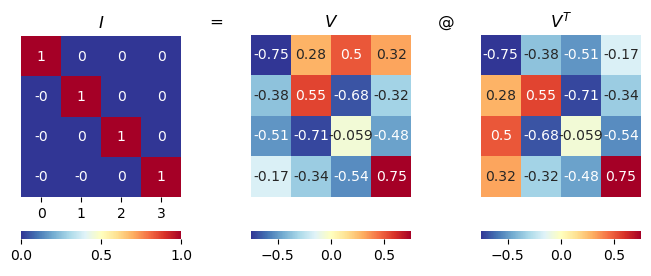

In [35]:
fig,axs = plt.subplots(1,5,figsize = (8,3), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]})

plt.sca(axs[0])
ax = sns.heatmap(V @ V_inv, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 yticklabels=False,
                 annot=True,
                 fmt=".0f",
                 square = 'equal')
plt.title('$I$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(V, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels = False,
                 annot=True)
plt.title('$V$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

plt.sca(axs[4])
ax = sns.heatmap(V.T, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 annot=True)
plt.title('$V^T$')

fig.savefig('Figures/V的性质，G的谱分解.svg', format='svg')

## 奇异值分解

In [39]:
# 鸢尾花数据矩阵X奇异值分解
U,S,VT = np.linalg.svd(X, full_matrices = False)
V_SVD = VT.T

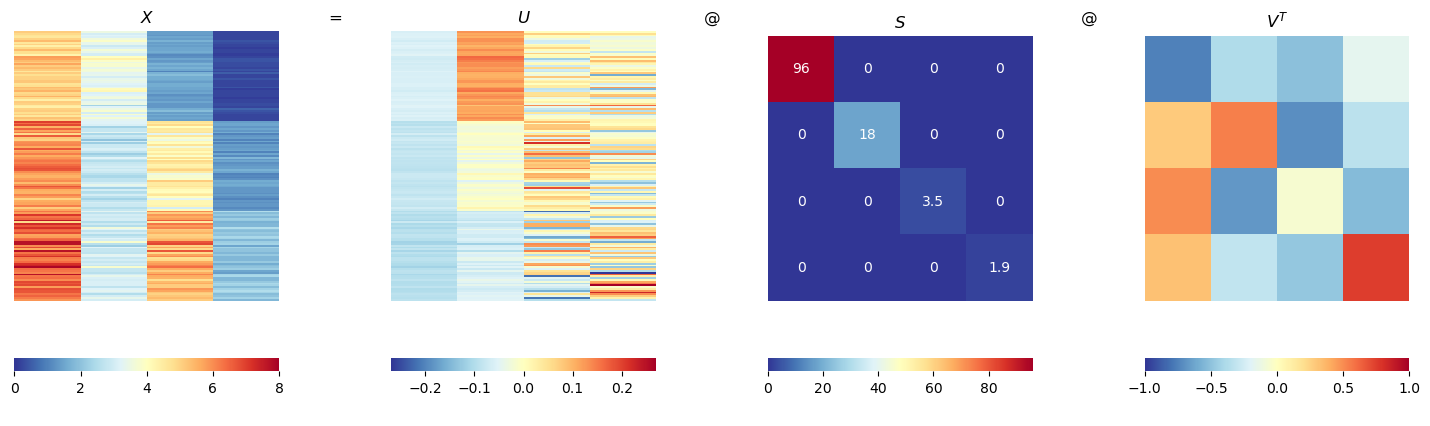

In [43]:
fig,axs = plt.subplots(1,7,figsize = (18,5), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3, 0.5, 3]})

plt.sca(axs[0])
ax = sns.heatmap(X, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 vmin = 0, vmax = 8,
                 yticklabels=False,
                 xticklabels = False)
plt.title('$X$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(U, cmap = 'RdYlBu_r',
                # vmax = 1, vmin = -1,
                cbar_kws = {'orientation':'horizontal'},
                xticklabels = False,
                yticklabels=False)
plt.title('$U$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

plt.sca(axs[4])
ax = sns.heatmap(np.diag(S), cmap = 'RdYlBu_r',
                # vmax = D_max, vmin = D_min,
                cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                yticklabels=False,
                 annot=True,
                square = 'equal')
plt.title('$S$')

plt.sca(axs[5])
plt.title('@')
plt.axis('off')    

plt.sca(axs[6])
ax = sns.heatmap(V_SVD.T, cmap = 'RdYlBu_r',
                vmax = 1, vmin = -1,
                cbar_kws = {'orientation':'horizontal'},
                yticklabels=False,
                xticklabels=False,
                square = 'equal')
plt.title('$V^T$')

fig.savefig('Figures/奇异值分解，SVD.svg', format='svg')

In [29]:
# SVD分解的奇异值性质

In [37]:
S

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [38]:
# 特征值开平方
np.sqrt(Lambdas)

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [29]:
# 奇异值分解中U的性质

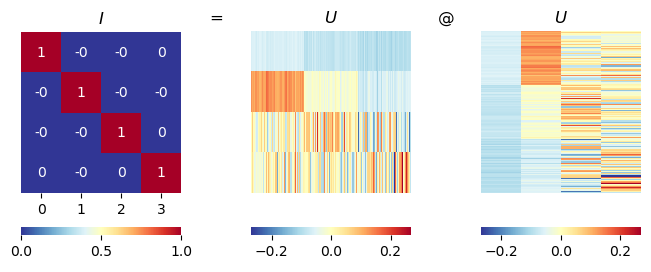

In [42]:
fig,axs = plt.subplots(1,5,figsize = (8,3), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]})

plt.sca(axs[0])
ax = sns.heatmap(U.T @ U, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 yticklabels=False,
                 annot=True,
                 fmt=".0f",
                 square = 'equal')
plt.title('$I$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(U.T, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels = False,
                 annot=False)
plt.title('$U$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

plt.sca(axs[4])
ax = sns.heatmap(U, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 annot=False)
plt.title('$U$')

fig.savefig('Figures/U的性质，奇异值分解.svg', format='svg')

In [29]:
# 奇异值分解中V的性质

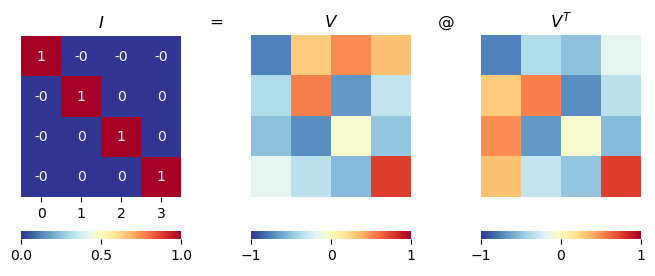

In [47]:
fig,axs = plt.subplots(1,5,figsize = (8,3), 
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]})

plt.sca(axs[0])
ax = sns.heatmap(V_SVD @ V_SVD.T, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 yticklabels=False,
                 annot=True,
                 fmt=".0f",
                 square = 'equal')
plt.title('$I$')

plt.sca(axs[1])
plt.title('=')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(V_SVD, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 vmax = 1, vmin = -1,
                 xticklabels = False,
                 yticklabels = False,
                 annot=False)
plt.title('$V$')

plt.sca(axs[3])
plt.title('@')
plt.axis('off')    

plt.sca(axs[4])
ax = sns.heatmap(V_SVD.T, cmap = 'RdYlBu_r',
                 cbar_kws = {'orientation':'horizontal'},
                 vmax = 1, vmin = -1,
                 xticklabels = False,
                 yticklabels=False,
                 annot=False)
plt.title('$V^T$')

fig.savefig('Figures/V的性质，G的谱分解.svg', format='svg')

In [30]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023